# Model Validation

In [3]:
%cd '/Users/Vincent/Desktop/Python/DataCamp/Data'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Vincent/Desktop/Python/DataCamp/Data


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, mean_absolute_error as mae
from sklearn.model_selection import train_test_split

ttt = pd.read_csv('tic-tac-toe.csv')

# Create dummy variables using pandas
X = pd.get_dummies(ttt.iloc[:, 0:9])
y = ttt.iloc[:, 9].replace('positive','1')\
                    .replace('negative','0')\
                    .astype(float)

# Create temporary training and final testing datasets
X_train, X_test, y_train, y_test  =\
    train_test_split(X, y, test_size=0.20, random_state=1111)

# Create predictions
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
test_predictions = rfc.predict(X_test)

cm = confusion_matrix(y_test, test_predictions)
print(cm)
score = precision_score(y_test, test_predictions)

# Print the true positives and precision score
print("The number of true positives is: {}".format(cm[1, 1]))
print("The precision value is {0:.2f}".format(score))

[[ 57   3]
 [  0 132]]
The number of true positives is: 132
The precision value is 0.98


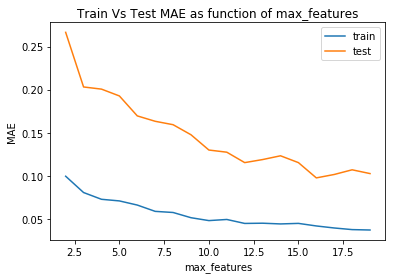

In [5]:
from sklearn.ensemble import RandomForestRegressor
# Update the rfr model
train_acc = []
test_acc = []
max_features = range(2,20)

for features in max_features:
    rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=features)
    rfr.fit(X_train, y_train)
    train_acc.append(mae(y_train, rfr.predict(X_train)))
    test_acc.append(mae(y_test, rfr.predict(X_test)))

plt.plot(max_features,train_acc, label="train")
plt.plot(max_features,test_acc, label="test")
plt.xlabel('max_features')
plt.ylabel('MAE')
plt.title('Train Vs Test MAE as function of max_features')
plt.legend()
plt.show()

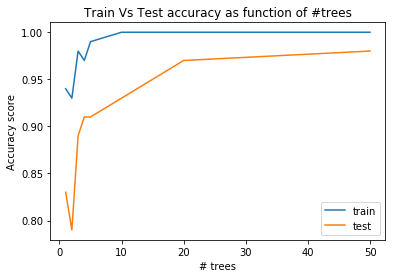

In [6]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
trees = [1, 2, 3, 4, 5, 10, 20, 50]
for i in trees:
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)
    # Create predictions for the X_train and X_test datasets.
    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)
    # Append the accuracy score for the test and train predictions.
    train_scores.append(round(accuracy_score(train_predictions, y_train), 2))
    test_scores.append(round(accuracy_score(test_predictions, y_test), 2))
# Print the train and test scores.

plt.plot(trees,train_scores, label="train")
plt.plot(trees,test_scores, label="test")
plt.xlabel('# trees')
plt.ylabel('Accuracy score')
plt.title('Train Vs Test accuracy as function of #trees')
plt.legend()
plt.show()

## Class imbalance

In [7]:
# Create two different samples of 200 observations 
sample1 = ttt.sample(200, random_state=1111)
sample2 = ttt.sample(200, random_state=1171)

# Print the number of common observations 
in_common = len([index for index in sample1.index if index in sample2.index])
print("Amount of observations in common: {}".format(in_common))

# Print the number of observations in the Class column for both samples 
print(sample1['Class'].value_counts())
print(sample2['Class'].value_counts())

Amount of observations in common: 40
positive    134
negative     66
Name: Class, dtype: int64
positive    123
negative     77
Name: Class, dtype: int64


## Cross-validation

In [20]:
from sklearn.model_selection import KFold

candy = pd.read_csv('candy-data.csv')
X = candy.iloc[:, 1:-1]
y = candy.iloc[:,1:-1]

# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))

Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

# Access the training and validation indices of splits
for train_index, val_index in splits:
    
    # Setup the training and validation data
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    
    # Fit the random forest model
    rfc.fit(X_train, y_train)
    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy: {}".format(str(mse(y_val, predictions))))

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc,
                     X=X,
                     y=y,
                     cv=10,
                     scoring=mse)

# Print the mean error
print("Mean Error: {}".format(cv.mean()))

Mean Error: 0.027190077304217065


In [32]:
# Leave one out
mae_scorer = make_scorer(mae)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

scores = cross_val_score(rfr, X=X, y=y, cv=y.shape[0], scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 0.06248114070003567.
The standard deviation of the errors is: 0.062397892402444526.


## Parameter Tuning

In [39]:
import random
# Review the parameters of rfr
print(rfr.get_params())

max_depth = [4, 8, 12]
min_samples_split = [2, 5, 10]
max_features = [4, 6, 8, 10]

# Fill in rfr using your variables
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=random.choice(max_depth),
    min_samples_split=random.choice(min_samples_split),
    max_features=random.choice(max_features))

# Print out the parameters
print(rfr.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 12, 'max_features': 6, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'criterion': 'mse', 'max_depth': 12, 'max_features': 6, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [48]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [2,4,6,8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

rfr = RandomForestRegressor(n_estimators=100, random_state=1111)

scorer = make_scorer(mean_squared_error)
rs = RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring=scorer)

rs.fit(X,y)
rs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False,
           random_state=1111, verbose=0, warm_start=False)